## Assignment-Lesson02

## Test

In [1]:
import requests

In [21]:
subway_url = 'https://www.bjsubway.com/station/xltcx/'
subway_data = requests.get(subway_url,verify=False)

C:\DevSoft\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [22]:
print(subway_data.encoding)
subway_data.encoding = 'gbk'
print(subway_data.encoding)

ISO-8859-1
gbk


In [57]:
print(subway_data.text)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=gb2312" />
<title>站点及周边信息 | 北京地铁官方网站</title>
<meta name="keywords" content="北京地铁官方网站,地铁线路图,站内信息,站点首末车时间,公交换乘,服务设施,一卡通网点,站内立体示意图" />
<meta name="description" content="北京地铁线路查询，站点详细信息查询，能够更高效的获取地铁出行路线，得知指定站点的详细信息，使出行更加方便快捷。" />
<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />
<link href="/subway/css/common.css" rel="stylesheet" type="text/css" />
<link href="/subway/css/search.css" rel="stylesheet" type="text/css" />
<script type="text/javascript" src="/subway/js/jquery.js"></script>
<script type="text/javascript" src="/subway/js/SubwayManager_min.js"></script>
</head>
<body>
<div class="wrap">
    <script>
var _hmt = _hmt || [];
(function() {
  var hm = document.createElement("script");
  hm.src = "https://hm.baidu.com/hm.js?01cf1cc88df5e

In [23]:
from bs4 import BeautifulSoup
import json

In [60]:
soup = BeautifulSoup(subway_data.text,"html.parser")

In [61]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>站点及周边信息 | 北京地铁官方网站</title>
<meta content="北京地铁官方网站,地铁线路图,站内信息,站点首末车时间,公交换乘,服务设施,一卡通网点,站内立体示意图" name="keywords"/>
<meta content="北京地铁线路查询，站点详细信息查询，能够更高效的获取地铁出行路线，得知指定站点的详细信息，使出行更加方便快捷。" name="description"/>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/subway/css/common.css" rel="stylesheet" type="text/css"/>
<link href="/subway/css/search.css" rel="stylesheet" type="text/css"/>
<script src="/subway/js/jquery.js" type="text/javascript"></script>
<script src="/subway/js/SubwayManager_min.js" type="text/javascript"></script>
</head>
<body>
<div class="wrap">
<script>
var _hmt = _hmt || [];
(function() {
  var hm = document.createElement("script");
  hm.src = "https://hm.baidu.com

In [26]:
print(soup.title)

<title>站点及周边信息 | 北京地铁官方网站</title>


In [27]:
print(soup.head)

<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>站点及周边信息 | 北京地铁官方网站</title>
<meta content="北京地铁官方网站,地铁线路图,站内信息,站点首末车时间,公交换乘,服务设施,一卡通网点,站内立体示意图" name="keywords"/>
<meta content="北京地铁线路查询，站点详细信息查询，能够更高效的获取地铁出行路线，得知指定站点的详细信息，使出行更加方便快捷。" name="description"/>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/subway/css/common.css" rel="stylesheet" type="text/css"/>
<link href="/subway/css/search.css" rel="stylesheet" type="text/css"/>
<script src="/subway/js/jquery.js" type="text/javascript"></script>
<script src="/subway/js/SubwayManager_min.js" type="text/javascript"></script>
</head>


In [62]:
print(soup.div)

<div class="wrap">
<script>
var _hmt = _hmt || [];
(function() {
  var hm = document.createElement("script");
  hm.src = "https://hm.baidu.com/hm.js?01cf1cc88df5ecf7e38164197b4a2001";
  var s = document.getElementsByTagName("script")[0]; 
  s.parentNode.insertBefore(hm, s);
})();
</script>
<div class="header_top">
<div class="logo" onclick="javascript:window.location.href='/index.html'" onmouseleave="this.style.backgroundColor='#fff'" onmouseover="this.style.backgroundColor='#e6edf5'" style="cursor:pointer"></div>
<div class="weather"><!--<script type="text/javascript" src="http://ext.weather.com.cn/45339.js"></script>--></div>
<div class="search">
<div class="search_top">
<!--<div class="lang">
              	<ul>
                    <li><a href="/">首&nbsp;页</a></li>
                    <li><a href="javascript:void(0)">ENGLISH</a></li>
                </ul>
              </div>-->
<div class="info">
<ul>
<li style="text-align:left;"><a href="/">网站首页</a></li>
<li><a href="/support/xxgk

In [64]:
import re
subway_data_clean = soup.find_all(href=re.compile("station/xltcx/line"))

In [73]:
from collections import Iterable
print(isinstance(subway_data_clean,Iterable))

True


## assignment  1   北京地铁换乘

In [76]:
import requests
import re
from bs4 import BeautifulSoup

def getSubwayData(url,rules,encoding='gbk'):
    subway_data = requests.get(url,verify=False)
    subway_data.encoding = encoding
    soup = BeautifulSoup(subway_data.text,"html.parser")
    subway_data_clean = soup.find_all(href=re.compile(rules))
    
    return subway_data_clean
    

In [108]:
subway_url = 'https://www.bjsubway.com/station/xltcx/'
subway_url_mtr = 'http://www.mtr.bj.cn/instruct/station_main.html'

In [80]:
stations = getSubwayData(subway_url,"station/xltcx/line")

C:\DevSoft\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [127]:
station_mrt = getSubwayData(subway_url_mtr,"instruct/map_\d{1,2}.html",encoding='utf-8')

In [87]:
print(stations[1])

<a href="/station/xltcx/line1/2013-08-19/4.html">古城</a>


In [135]:
print(station_mrt[1])

<a href="../instruct/map_4.html" title="">安河桥北站</a>


In [359]:
station_collection = {}
for s in stations:
    pattern = re.compile(r'station/xltcx/(line[0-9a-z]{1,2})/20\d{2}-\d{2}-\d{2}/\d{1,3}.html\"\>(\w+)')
    line_station = pattern.findall(str(s))
    if not line_station:
        print(s)
        break
    line = line_station[0][0]
    station = line_station[0][1]
    if line in station_collection:
        station_collection[line].append(station)
    else:
        station_collection[line] = [station]

In [360]:
for s in station_mrt:
    pattern = re.compile(r'instruct/(map_[0-9]{1,2})\.html\"\s+title\=\"\"\>(\w+)')
    line_station = pattern.findall(str(s))
    if not line_station:
        print(s)
        continue
    line = re.sub(r'map_','line',line_station[0][0])    
    station = line_station[0][1]
    if station not in ('北京站','北京西站','北京南站'):
        station = re.sub(r'站','',station)    
    
    if line in station_collection:
        station_collection[line].append(station)
    else:
        station_collection[line] = [station]

<a href="../instruct/map_4.html">
<img height="234" src="../images/line4map.jpg" width="136"/></a>
<a href="../instruct/map_14.html">
<img height="234" src="../images/line14map.jpg" width="136"/></a>
<a href="../instruct/map_16.html">
<img height="234" src="../images/line16map.jpg" width="136"/></a>


In [150]:
pattern = re.compile(r'station/xltcx/(line[0-9a-z]{1,2})/20\d{2}-0\d-\d{2}/\d{1,3}.html\"\>(\w+)')
print(pattern.findall(str(stations[1])))

[('line1', '古城')]


In [361]:
print(station_collection)

{'line1': ['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东'], 'line2': ['西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '复兴门', '阜成门', '车公庄'], 'line5': ['宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '崇文门', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北'], 'line6': ['金安桥', '苹果园', '杨庄', '西黄村', '廖公庄', '田村', '海淀五路居', '慈寿寺', '花园桥', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台路', '十里堡', '青年路', '褡裢坡', '黄渠', '常营', '草房', '物资学院路', '通州北关', '北运河西', '北运河东', '郝家府', '东夏园', '潞城'], 'lines7': ['北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口', '广渠门内', '广渠门外', '九龙山', '大郊亭', '百子湾', '化工', '南楼梓庄', '欢乐谷景区', '垡头', '双合', '焦化厂'], 'line8': ['朱辛庄', '育知路', '平西府', '回龙观东大街', '霍营', '育新', '西小口', '永泰庄', '林萃桥', '森林公园南门', '奥林匹克公园', '奥体中心', 

In [362]:
def getGeographic_Location(address,city,api_key):
    url = "https://restapi.amap.com/v3/geocode/geo?key=" + str(api_key) + "&address=" + str(address) + "&city=" + str(city)
    #print(url)
    geo = requests.get(url)
    location = json.loads(geo.text)
    if location['status'] == '1' and location['geocodes']:
        return location['geocodes'][0]['location']
    else:
        print(location)
    

In [199]:
api_key= '1842109a7946d46686497fafd23a14d7'
getGeographic_Location('枣营站地铁站','北京',api_key)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '0', 'geocodes': []}


In [363]:
station_collection_geo = {}
for k in station_collection.keys():
    for s in station_collection[k]:
        Latitude_longitude = getGeographic_Location(str(s)+'地铁站','北京',api_key)
        if not Latitude_longitude: continue
        long,lati = Latitude_longitude.split(',')
        station_collection_geo[str(s)]=(float(long),float(lati))
        

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '0', 'geocodes': []}
{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '0', 'geocodes': []}
{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '0', 'geocodes': []}
{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '0', 'geocodes': []}


In [404]:
station_collection_geo['珠市口']

(116.398695, 39.890794)

In [415]:
from collections import defaultdict
station_connection = defaultdict(list)
for k in station_collection.keys():
    for i,s in enumerate(station_collection[k]):        
        if i+1 < len(station_collection[k]) and station_collection[k][i+1] != '善各庄':
            station_connection[s].append(station_collection[k][i+1]) 
        if i-1 >= 0 and station_collection[k][i-1] != '张郭庄':
            station_connection[s].append(station_collection[k][i-1])        
        

In [417]:
station_connection['张郭庄']

['园博园']

In [370]:
import networkx as nx
%matplotlib inline

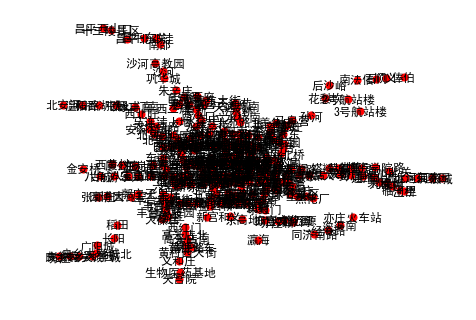

In [374]:
city_graph = nx.Graph()
city_graph.add_nodes_from(station_collection_geo.keys())
nx.draw(city_graph,station_collection_geo,with_labels=True,node_size=50)

In [375]:
def search(start,destination,connection_graph,sort_candidata):
    pathes = [[start]]
    
    visitied = set()
    #i = 0
    while pathes:
      
        path = pathes.pop() #弹出最后一个
        #path = pathes.pop(0) #弹出第0个
        
        #print(path)
        frontier = path[-1]
        
        if frontier in visitied: continue
        
        successor = connection_graph[frontier]
        
        for city in successor:
            new_path = path + [city]
            #pathes.append(new_path)
            #pathes =   [new_path] + pathes 
            pathes =    pathes + [new_path] #每次都扩展最新的
            
            if city == destination: return new_path
        
        visitied.add(frontier)
        
        pathes = sort_candidata(pathes)   #加排序函数，对搜索策略进行控制

In [380]:
import math
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [405]:
def get_geo_distance(s1, s2):
    if s1 in station_collection_geo and s2 in station_collection_geo:
        return geo_distance(station_collection_geo[s1], station_collection_geo[s2])
    else:
        return get_geo_distance('东风北桥','西局')

In [402]:
get_geo_distance('东风北桥','西局')

4.724738616925447

In [391]:
def transfer_as_much_station(pathes):
    return sorted(pathes,key=len)  #这里要不要加reverse跟search函数pop(0)还是pop()有关

In [392]:
def transfer_station_first(pathes):
    return sorted(pathes,key=len,reverse=True)

In [393]:
def shortest_path_first(pathes):
    def get_path_distance(path):
        distance = 0
        for station in path[:-1]:
            distance += get_geo_distance(station,path[-1])
        return distance
    return sorted(pathes,key=get_path_distance)

In [418]:
search('东风北桥','西局',station_connection,shortest_path_first)

['东风北桥',
 '枣营',
 '朝阳公园',
 '金台路',
 '呼家楼',
 '东大桥',
 '朝阳门',
 '东四',
 '南锣鼓巷',
 '北海北',
 '平安里',
 '车公庄',
 '阜成门',
 '复兴门',
 '长椿街',
 '宣武门',
 '菜市口',
 '广安门内',
 '达官营',
 '湾子',
 '北京西站',
 '六里桥东',
 '六里桥',
 '西局']

In [419]:
search('东风北桥','西局',station_connection,transfer_station_first)

['东风北桥',
 '枣营',
 '朝阳公园',
 '金台路',
 '大望路',
 '九龙山',
 '广渠门外',
 '广渠门内',
 '磁器口',
 '桥湾',
 '珠市口',
 '虎坊桥',
 '菜市口',
 '广安门内',
 '达官营',
 '湾子',
 '北京西站',
 '六里桥东',
 '六里桥',
 '西局']

In [420]:
search('东风北桥','西局',station_connection,transfer_as_much_station)

['东风北桥',
 '将台',
 '高家园',
 '望京南',
 '阜通',
 '望京',
 '望京西',
 '关庄',
 '大屯路东',
 '安立路',
 '奥林匹克公园',
 '森林公园南门',
 '林萃桥',
 '永泰庄',
 '西小口',
 '育新',
 '霍营',
 '回龙观',
 '龙泽',
 '西二旗',
 '上地',
 '五道口',
 '知春路',
 '大钟寺',
 '西直门',
 '动物园',
 '国家图书馆',
 '白石桥南',
 '白堆子',
 '军事博物馆',
 '北京西站',
 '六里桥东',
 '六里桥',
 '西局']

In [423]:
sorted(['a','abvd','abc'],key=len)

['a', 'abc', 'abvd']

## 2. Answer following questions:
1. Why do we need machine learning methods instead of creating a complicated formula?

Ans: 复杂的函数只能满足特定情况，当数据发生变化时得重新创建新函数， 使用机器学习可以随数据变化自动得到最优函数

2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?

Ans: 随机选择没有方向，有可能选错方向，是的损失函数值越来越大

3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?

Ans:  监督学习要好于随机选择，劣势？

4. Why do we use Derivative / Gredient to fit a target function?

Ans: ？ 

5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?

Ans: 梯度是指函数对所有自变量的偏导，梯度下降是指沿着梯度值下降得方向迭代

6. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans: 梯度下降法相比前面两种方法能更快的迭代到最优点

7. Using the simple words to describe: What's the machine leanring.¶

Ans: 机器学习算法使直接从数据中“学习”信息，而不依赖于预定方程模型，通过不断的学习最后达到最优